In [1]:
import pandas as pd

data = pd.read_csv("../Scrappers/EconomicIndicators.csv")

In [2]:
data.head()

,Date,Contraction,Unemployment,Yield Spread,GDP pct change
0,1953-04-01,0.0,2.6,0.57,0.772984
1,1953-07-01,1.0,2.7,0.63,-0.562694
2,1953-10-01,1.0,3.7,0.93,-1.513976
3,1954-01-01,1.0,5.3,1.21,-0.478013
4,1954-04-01,1.0,5.8,1.47,0.108991


In [3]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Activation

data["GDP pct change"].min()

C:\Users\Julie\Anaconda3\envs\PythonData3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


-2.595847408291707

In [4]:
data["GDP pct change"] = data["GDP pct change"]
GDPchange=data.drop(["Date", "Contraction", "Unemployment", "Yield Spread"], axis = 1)
data_list = GDPchange.values
train = data_list[0:192,:]
test = data_list[192:,:]

In [5]:
scaler =MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data_list)

In [6]:
x_train = []
y_train = []

sequence_length = 60

for i in range(0, len(train) - sequence_length):
    x_train.append(scaled_data[i: i + sequence_length])
    y_train.append(scaled_data[i + sequence_length])

In [7]:
import numpy as np

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

x_train.shape

(132, 60, 1)

In [10]:
neurons = 50
model = Sequential()
model.add(LSTM(units=neurons, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=neurons))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=5, batch_size=1, verbose=2)

Epoch 1/2
 - 9s - loss: 0.1008
Epoch 2/2
 - 7s - loss: 0.0238


In [11]:

inputs = GDPchange[len(GDPchange) - len(test) - sequence_length:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
inputs.shape
len(GDPchange)
len(test)

64

In [12]:
x_test = []
for i in range(sequence_length,inputs.shape[0]):
    x_test.append(inputs[i-sequence_length:i,0])
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
GDP_pct_change = model.predict(x_test)


In [13]:
GDP_pct_change = scaler.inverse_transform(GDP_pct_change)

In [14]:
last_64=pd.DataFrame()

In [15]:
last_64["Observed"] = GDPchange["GDP pct change"][192:]
last_64.shape
GDP_pct_change.shape

(64, 1)

In [16]:
last_64["Date"] = data["Date"][192:256]

last_64["Predicted"] = GDP_pct_change

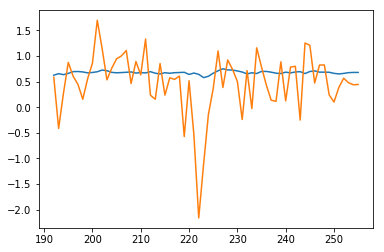

In [18]:
import matplotlib.pyplot as plt

#plt.plot(data["GDP pct change"][0:192])
plt.plot(last_64[['Predicted','Observed']])
plt.show()